In [2]:
import pandas as pd
import numpy as np                         # Importing Pandas Library
pd.set_option("display.max_columns",None)    # It will display all colum in Jupyter Notebook
df=pd.read_csv("/content/Food data.csv")     #Reading CSV File
df.head(5)                                   # Display

ID        date  meals_served kitchen_staff  temperature_C  \
0   0  12/19/2022         196.0            13      27.887273   
1   1  11/21/2023         244.0            15      10.317872   
2   2    2/1/2022         148.0            16      27.714300   
3   3   3/19/2023         157.0            19      19.173902   
4   4   7/18/2022         297.0            10      26.375233   

   humidity_percent  day_of_week special_event  past_waste_kg  \
0         45.362854            0             0       7.740587   
1         64.430475            1             0      42.311779   
2         69.046113            1             0      41.184305   
3         46.292823            6             0      41.543492   
4         79.741064            0             0      26.525097   

  staff_experience waste_category  
0     intermediate          dairy  
1              NaN           MeAt  
2         Beginner           MeAt  
3         Beginner           MeAt  
4     Intermediate           MEAT

### General information of Dataset

In [3]:
df.info()   # General Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


### Drop ID Column

In [4]:
df =df.drop('ID', axis=1)  # Drop the 'ID' column, as this column has not been compiled corrctly, Same day sales record is found multiple times
df.to_csv("/content/Food data.csv", index=False) # Update the existing CSV file

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1822 non-null   object 
 1   meals_served      1790 non-null   float64
 2   kitchen_staff     1804 non-null   object 
 3   temperature_C     1822 non-null   float64
 4   humidity_percent  1806 non-null   float64
 5   day_of_week       1822 non-null   int64  
 6   special_event     1822 non-null   object 
 7   past_waste_kg     1806 non-null   float64
 8   staff_experience  1485 non-null   object 
 9   waste_category    1801 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 142.5+ KB


### DATA CLEANING

In [6]:
# Removing White spaces, coverting to lower case and replacing blank/others to NaN

def clean_df(df, columns):
         for col in columns:
             df[col] = df[col].astype(str).str.strip()  # Remove leading/trailing spaces
             df[col] = df[col].replace([' ', '-', '?', 'N/A', 'nan', 'NaN', ''], np.nan)
             df[col]= df[col].str.lower()  # converts text to lowercase
             # Handle other specific cases if necessary
             # (e.g., converting "unknown" to np.nan for categorical variables)
         return df

In [7]:
df.columns

Index(['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category'],
      dtype='object')

In [8]:
columns=['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category']

df = clean_df(df, columns)  # cleaning data and overwritting orignal dataframe (Saving changes)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1822 non-null   object
 1   meals_served      1790 non-null   object
 2   kitchen_staff     1804 non-null   object
 3   temperature_C     1822 non-null   object
 4   humidity_percent  1806 non-null   object
 5   day_of_week       1822 non-null   object
 6   special_event     1822 non-null   object
 7   past_waste_kg     1806 non-null   object
 8   staff_experience  1485 non-null   object
 9   waste_category    1801 non-null   object
dtypes: object(10)
memory usage: 142.5+ KB


### Removing Data Inconsistencies

#### meals_served: Remove (.0) in the end

In [10]:
df['meals_served'].unique()

array(['196.0', '244.0', '148.0', '157.0', '297.0', '241.0', '443.0',
       '416.0', '439.0', '267.0', '487.0', '418.0', '376.0', '372.0',
       '378.0', '265.0', '1560.0', '283.0', '138.0', '253.0', '152.0',
       '1110.0', '353.0', '489.0', '464.0', '430.0', '354.0', nan,
       '338.0', '358.0', '114.0', '100.0', '259.0', '174.0', '470.0',
       '262.0', '218.0', '272.0', '492.0', '280.0', '317.0', '382.0',
       '289.0', '361.0', '266.0', '119.0', '351.0', '441.0', '385.0',
       '373.0', '236.0', '326.0', '352.0', '407.0', '188.0', '251.0',
       '205.0', '121.0', '479.0', '483.0', '177.0', '189.0', '294.0',
       '195.0', '357.0', '295.0', '312.0', '485.0', '454.0', '250.0',
       '212.0', '445.0', '200.0', '473.0', '440.0', '384.0', '425.0',
       '368.0', '444.0', '374.0', '363.0', '341.0', '291.0', '202.0',
       '491.0', '235.0', '448.0', '107.0', '172.0', '206.0', '228.0',
       '134.0', '405.0', '350.0', '273.0', '495.0', '197.0', '269.0',
       '355.0', '256.0

In [11]:
df['meals_served'] = df['meals_served'].astype(str).str.rstrip('.0')  # It takes whole colum as string and then removes ".0" in the end
df['meals_served'].unique()

array(['196', '244', '148', '157', '297', '241', '443', '416', '439',
       '267', '487', '418', '376', '372', '378', '265', '156', '283',
       '138', '253', '152', '111', '353', '489', '464', '43', '354',
       'nan', '338', '358', '114', '1', '259', '174', '47', '262', '218',
       '272', '492', '28', '317', '382', '289', '361', '266', '119',
       '351', '441', '385', '373', '236', '326', '352', '407', '188',
       '251', '205', '121', '479', '483', '177', '189', '294', '195',
       '357', '295', '312', '485', '454', '25', '212', '445', '2', '473',
       '44', '384', '425', '368', '444', '374', '363', '341', '291',
       '202', '491', '235', '448', '107', '172', '206', '228', '134',
       '405', '35', '273', '495', '197', '269', '355', '256', '12', '307',
       '383', '104', '245', '426', '149', '459', '472', '109', '293',
       '286', '328', '468', '268', '18', '279', '4', '456', '49', '37',
       '217', '435', '488', '122', '214', '348', '203', '323', '135',
       '

#### temperature_C, hmidity_percent and past_waste_kg : Coverting to float and Round off to one decimal

In [12]:
# Round off to one decimal unit as many duplicate rows were found with slight decimal point changes to both of these columns
df['temperature_C'] = df['temperature_C'].astype(float).round(1)
df['humidity_percent'] = df['humidity_percent'].astype(float).round(1)
df['past_waste_kg'] = df['past_waste_kg'].astype(float).round(1)
print(df.head(5))

         date meals_served kitchen_staff  temperature_C  humidity_percent  \
0  12/19/2022          196            13           27.9              45.4   
1  11/21/2023          244            15           10.3              64.4   
2    2/1/2022          148            16           27.7              69.0   
3   3/19/2023          157            19           19.2              46.3   
4   7/18/2022          297            10           26.4              79.7   

  day_of_week special_event  past_waste_kg staff_experience waste_category  
0           0             0            7.7     intermediate          dairy  
1           1             0           42.3              NaN           meat  
2           1             0           41.2         beginner           meat  
3           6             0           41.5         beginner           meat  
4           0             0           26.5     intermediate           meat  


#### kitchen_staff and special_event: Alpha-numeric to numeric conversion and Int64

In [13]:
import pandas as pd

number_mapping_kstaff = {
    'ten': 10,
    'eleven': 11}

number_mapping_sevent = {'One': 10}

# Replace alpha-numeric values with their numeric counterparts
df['kitchen_staff'] = df['kitchen_staff'].replace(number_mapping_kstaff)    # replace 'ten', eleven' found as numeric
df['special_event'] = df['special_event'].replace(number_mapping_sevent)    # replace 'One' found as numeric


# Convert the column to numeric, coercing any remaining non-numeric values to NaN
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype('Int64')
df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce').astype('Int64')

#Int64 is Pandas' nullable integer data type. This means it can store both regular integers and NaN values.


In [14]:
df['kitchen_staff'].value_counts()

kitchen_staff
12    143
5     138
10    134
13    127
9     127
15    123
18    121
11    118
14    117
7     117
19    116
6     113
17    108
16    103
8      99
Name: count, dtype: Int64

In [15]:
df['special_event'].value_counts()

special_event
0    1666
1     148
Name: count, dtype: Int64

### Data Type Correction

In [16]:
print(df.head(5))
df.info()

         date meals_served  kitchen_staff  temperature_C  humidity_percent  \
0  12/19/2022          196             13           27.9              45.4   
1  11/21/2023          244             15           10.3              64.4   
2    2/1/2022          148             16           27.7              69.0   
3   3/19/2023          157             19           19.2              46.3   
4   7/18/2022          297             10           26.4              79.7   

  day_of_week  special_event  past_waste_kg staff_experience waste_category  
0           0              0            7.7     intermediate          dairy  
1           1              0           42.3              NaN           meat  
2           1              0           41.2         beginner           meat  
3           6              0           41.5         beginner           meat  
4           0              0           26.5     intermediate           meat  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries,

#### Date Column

In [17]:
df['date'] = df['date'].replace(['', 'N/A', 'nan',' ','-'], pd.NaT)  # Replace with NaT (handle missing values before conversion)

# dateutil library's parser module. It can often automatically detect the date format from a string

from dateutil import parser

def parse_date(date_str):
        try:
            return parser.parse(date_str)
        except ValueError:
            return pd.NaT  # Return NaT for unparsable dates

df['date'] = df['date'].apply(parse_date)

df.head(5)

date meals_served  kitchen_staff  temperature_C  humidity_percent  \
0 2022-12-19          196             13           27.9              45.4   
1 2023-11-21          244             15           10.3              64.4   
2 2022-02-01          148             16           27.7              69.0   
3 2023-03-19          157             19           19.2              46.3   
4 2022-07-18          297             10           26.4              79.7   

  day_of_week  special_event  past_waste_kg staff_experience waste_category  
0           0              0            7.7     intermediate          dairy  
1           1              0           42.3              NaN           meat  
2           1              0           41.2         beginner           meat  
3           6              0           41.5         beginner           meat  
4           0              0           26.5     intermediate           meat

#### Other remaing Columns to convert

In [18]:
# Coverting to numeric handling missing values (NaN)
for column in ['meals_served', 'day_of_week']:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(pd.Int64Dtype())

In [19]:
print(df.head(5))
df.info()

        date  meals_served  kitchen_staff  temperature_C  humidity_percent  \
0 2022-12-19           196             13           27.9              45.4   
1 2023-11-21           244             15           10.3              64.4   
2 2022-02-01           148             16           27.7              69.0   
3 2023-03-19           157             19           19.2              46.3   
4 2022-07-18           297             10           26.4              79.7   

   day_of_week  special_event  past_waste_kg staff_experience waste_category  
0            0              0            7.7     intermediate          dairy  
1            1              0           42.3              NaN           meat  
2            1              0           41.2         beginner           meat  
3            6              0           41.5         beginner           meat  
4            0              0           26.5     intermediate           meat  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 en

### Duplicates

#### Almost duplicate Rows Removed (Unique Date Entry)

In [20]:
df_test_1=df.copy()

In [21]:
df_test_1.groupby('date')

In [22]:
df_grouped_1 = df_test_1.groupby('date', as_index=False).agg({
    'meals_served':lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'kitchen_staff': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'temperature_C': lambda x: x.max(),
    'humidity_percent': lambda x: x.max(),
    'day_of_week': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'special_event': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'past_waste_kg': lambda x: x.max(),
    'staff_experience':'last',
    'waste_category': 'last'
    })

#x.mode() gets the most frequent value(s)
#.iloc[0] picks the first one (in case of a tie)
#if not x.mode().empty ensures we avoid errors with empty data

In [23]:
df_grouped_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              867 non-null    datetime64[ns]
 1   meals_served      867 non-null    Int64         
 2   kitchen_staff     867 non-null    Int64         
 3   temperature_C     867 non-null    float64       
 4   humidity_percent  867 non-null    float64       
 5   day_of_week       867 non-null    Int64         
 6   special_event     867 non-null    Int64         
 7   past_waste_kg     867 non-null    float64       
 8   staff_experience  711 non-null    object        
 9   waste_category    867 non-null    object        
dtypes: Int64(4), datetime64[ns](1), float64(3), object(2)
memory usage: 71.2+ KB


In [24]:
df = df_grouped_1

### Missing Values

In [25]:
df.isnull().sum()

date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    156
waste_category        0
dtype: int64

In [26]:
# Sometimes missing values are not detected so checking again each one by one
print("Missing Values")
print('date:',df['date'].isnull().sum())
print('meals_served:',df['meals_served'].isnull().sum())
print('kitchen_staff:',df['kitchen_staff'].isnull().sum())
print('temperature_C:',df['temperature_C'].isnull().sum())
print('humidity_percent:',df['humidity_percent'].isnull().sum())
print('day_of_week :',df['day_of_week'].isnull().sum())
print('special_event:',df['special_event'].isnull().sum())
print('past_waste_kg :',df['past_waste_kg'].isnull().sum())
print('staff_experience :',df['staff_experience'].isnull().sum())
print('waste_category :',df['waste_category'].isnull().sum())

Missing Values
date: 0
meals_served: 0
kitchen_staff: 0
temperature_C: 0
humidity_percent: 0
day_of_week : 0
special_event: 0
past_waste_kg : 0
staff_experience : 156
waste_category : 0


In [27]:
# % of missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentage:\n", missing_percentage)


Missing Value Percentage:
 date                 0.00000
meals_served         0.00000
kitchen_staff        0.00000
temperature_C        0.00000
humidity_percent     0.00000
day_of_week          0.00000
special_event        0.00000
past_waste_kg        0.00000
staff_experience    17.99308
waste_category       0.00000
dtype: float64


In [28]:
# staff_experience is a categorical column
df['staff_experience'].value_counts()

staff_experience
intermediate    350
beginner        179
expert          176
pro               6
Name: count, dtype: int64

In [29]:
# Fill missing values in staff_experience with mode of column
df['staff_experience'] = df['staff_experience'].fillna('unknown')

In [30]:
df['staff_experience'].value_counts()

staff_experience
intermediate    350
beginner        179
expert          176
unknown         156
pro               6
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              867 non-null    datetime64[ns]
 1   meals_served      867 non-null    Int64         
 2   kitchen_staff     867 non-null    Int64         
 3   temperature_C     867 non-null    float64       
 4   humidity_percent  867 non-null    float64       
 5   day_of_week       867 non-null    Int64         
 6   special_event     867 non-null    Int64         
 7   past_waste_kg     867 non-null    float64       
 8   staff_experience  867 non-null    object        
 9   waste_category    867 non-null    object        
dtypes: Int64(4), datetime64[ns](1), float64(3), object(2)
memory usage: 71.2+ KB


In [32]:
# Convert columns to int64
columns_to_convert = ['meals_served', 'kitchen_staff', 'day_of_week', 'special_event']
for column in columns_to_convert:
    df[column] = df[column].astype('int64')

# Print info to verify the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              867 non-null    datetime64[ns]
 1   meals_served      867 non-null    int64         
 2   kitchen_staff     867 non-null    int64         
 3   temperature_C     867 non-null    float64       
 4   humidity_percent  867 non-null    float64       
 5   day_of_week       867 non-null    int64         
 6   special_event     867 non-null    int64         
 7   past_waste_kg     867 non-null    float64       
 8   staff_experience  867 non-null    object        
 9   waste_category    867 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 67.9+ KB


In [33]:
df.to_csv('food_data_clean.csv', index=False) # Exporting csv file to review

####Outlier detect : Numerical Continious Columns

In [34]:
def detect_outliers_iqr(data, column_name):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"\n Column :{column_name}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Outlier Values with Counts:")
    print(outliers.value_counts().sort_index())  # Count and sort outlier values
    print(f"min: {lower_bound}, max:{upper_bound}")
    return outliers

# List of columns to check for outliers (Continious numeric columns)
continious_numeric_col = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

# Loop through the columns and detect outliers
for col in continious_numeric_col:
    outliers = detect_outliers_iqr(df[col], col)




 Column :meals_served
Number of Outliers: 0
Outlier Values with Counts:
Series([], Name: count, dtype: int64)
min: -148.75, max:705.25

 Column :temperature_C
Number of Outliers: 21
Outlier Values with Counts:
temperature_C
-10.0    12
 60.0     9
Name: count, dtype: int64
min: -3.950000000000003, max:48.45

 Column :humidity_percent
Number of Outliers: 0
Outlier Values with Counts:
Series([], Name: count, dtype: int64)
min: 1.5500000000000043, max:120.35

 Column :past_waste_kg
Number of Outliers: 0
Outlier Values with Counts:
Series([], Name: count, dtype: int64)
min: -17.150000000000006, max:71.25


In [49]:
df.to_csv("/content/Food data.csv", index=False) # Update the existing CSV file

### Visualization: Univariate Analysis

#### Univariate Analysis : Histogram - Continious Numeric Columns

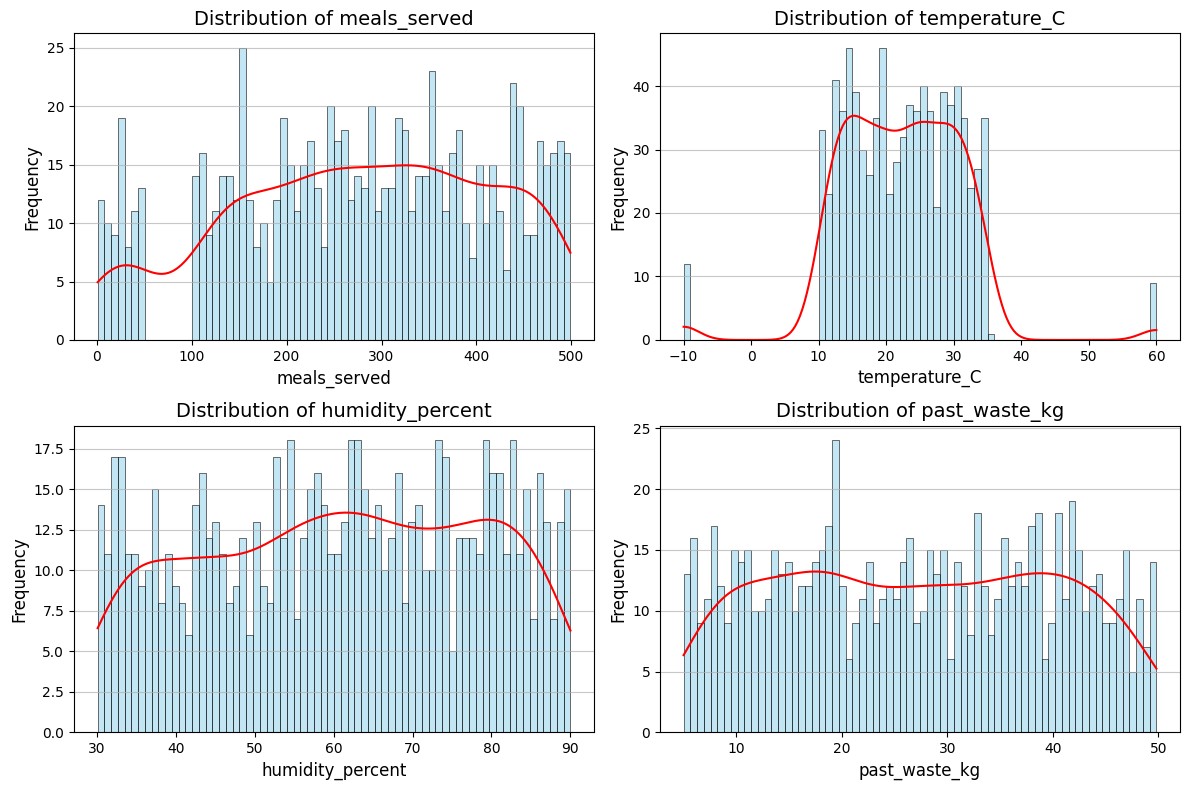

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
continious_numeric_col = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create histograms with KDE
for i, column in enumerate(continious_numeric_col):
    ax = axes[i]  # Get the current subplot

    # Plot histogram with KDE
    sns.histplot(df[column].dropna(), kde=True, bins=70, color='skyblue', edgecolor='black', ax=ax)

    # Access the KDE line and change its color
    kde_line = ax.lines[0]
    kde_line.set_color('red')

    # Formatting and labeling
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Univariate Analysis : Box Plot - Continious Numeric Columns

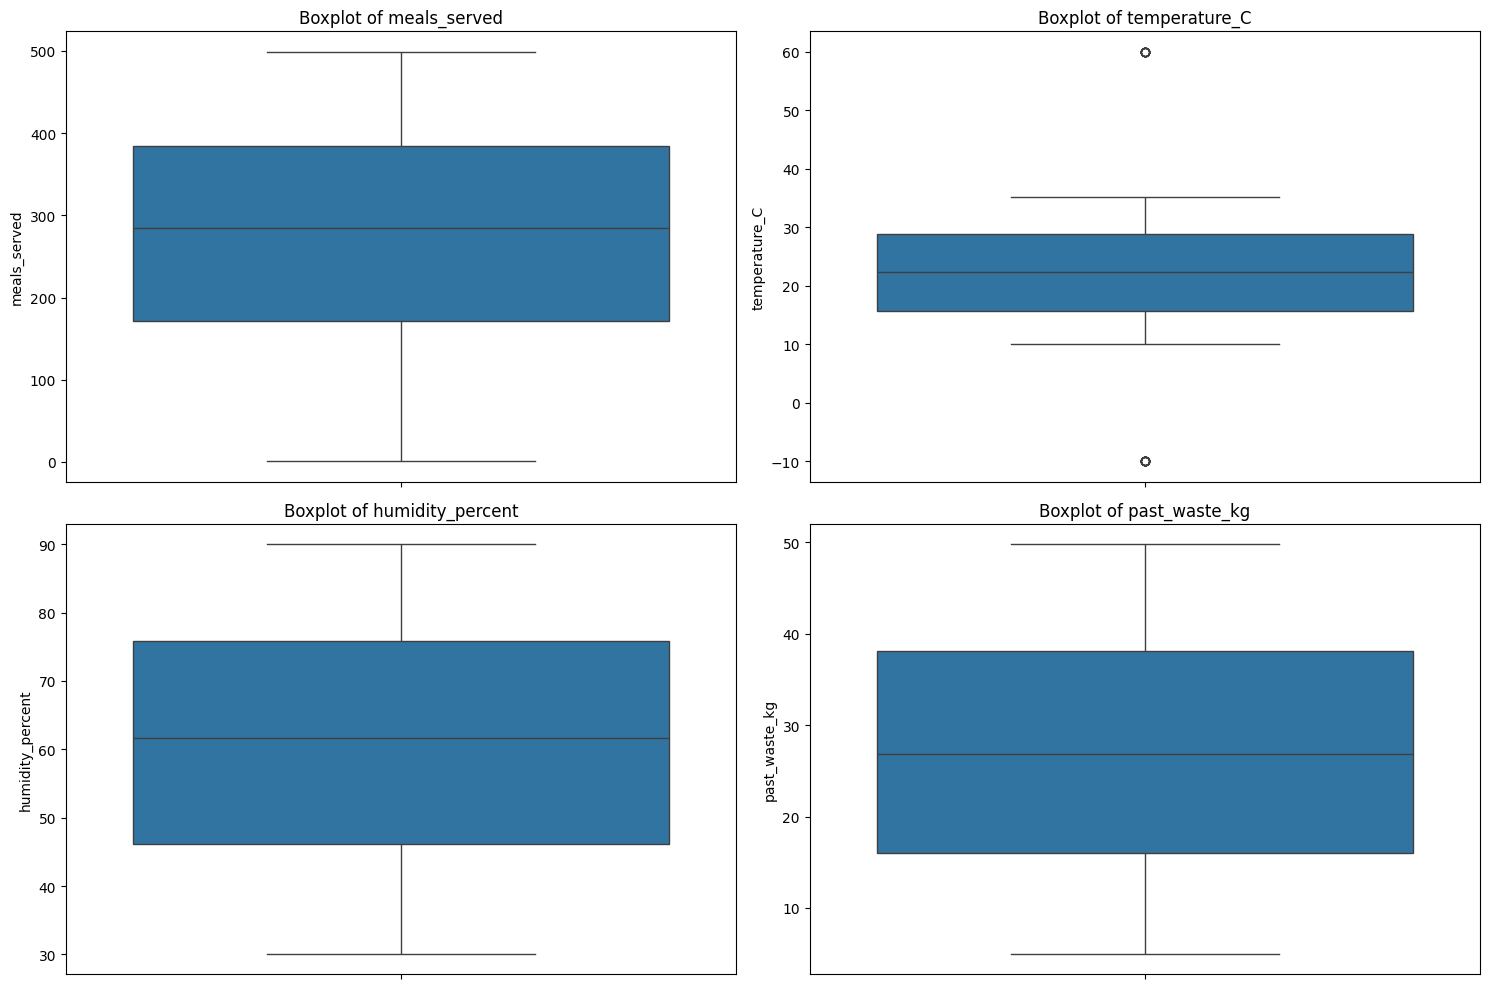

In [98]:
continious_numeric_col = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

plt.figure(figsize=(15, 10))
for i, col in enumerate(continious_numeric_col):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#### Univariate Analysis: Count Plot - Categorical Columns

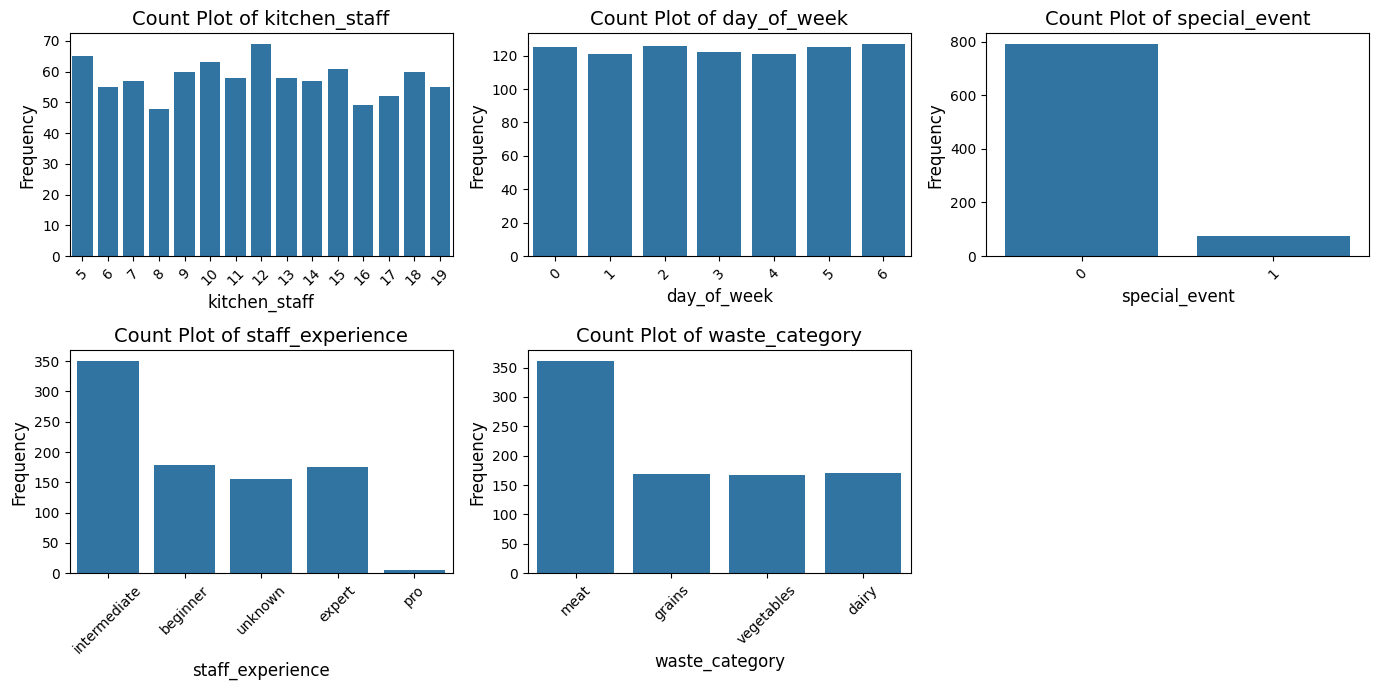

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_col = ['kitchen_staff', 'day_of_week', 'special_event', 'staff_experience', 'waste_category']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 7))  # 2 rows, 3 columns of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, column in enumerate(categorical_col):
    ax = axes[i]  # Get the current subplot
    sns.countplot(x=column, data=df, ax=ax)  # Create the count plot

    # Formatting and labeling
    ax.set_title(f'Count Plot of {column}', fontsize=14)  # Set title
    ax.set_xlabel(column, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Set y-axis label
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust spacing between subplots
plt.tight_layout()

# Remove the empty subplot (if any)
if len(categorical_col) < len(axes):
    fig.delaxes(axes[-1])  # Remove the last subplot if it's empty

# Show the plot
plt.show()

### Bivariate Analysis

#### Bivariate Analysis: Scatter Plot- Continious Numeric Columns (All combinations)

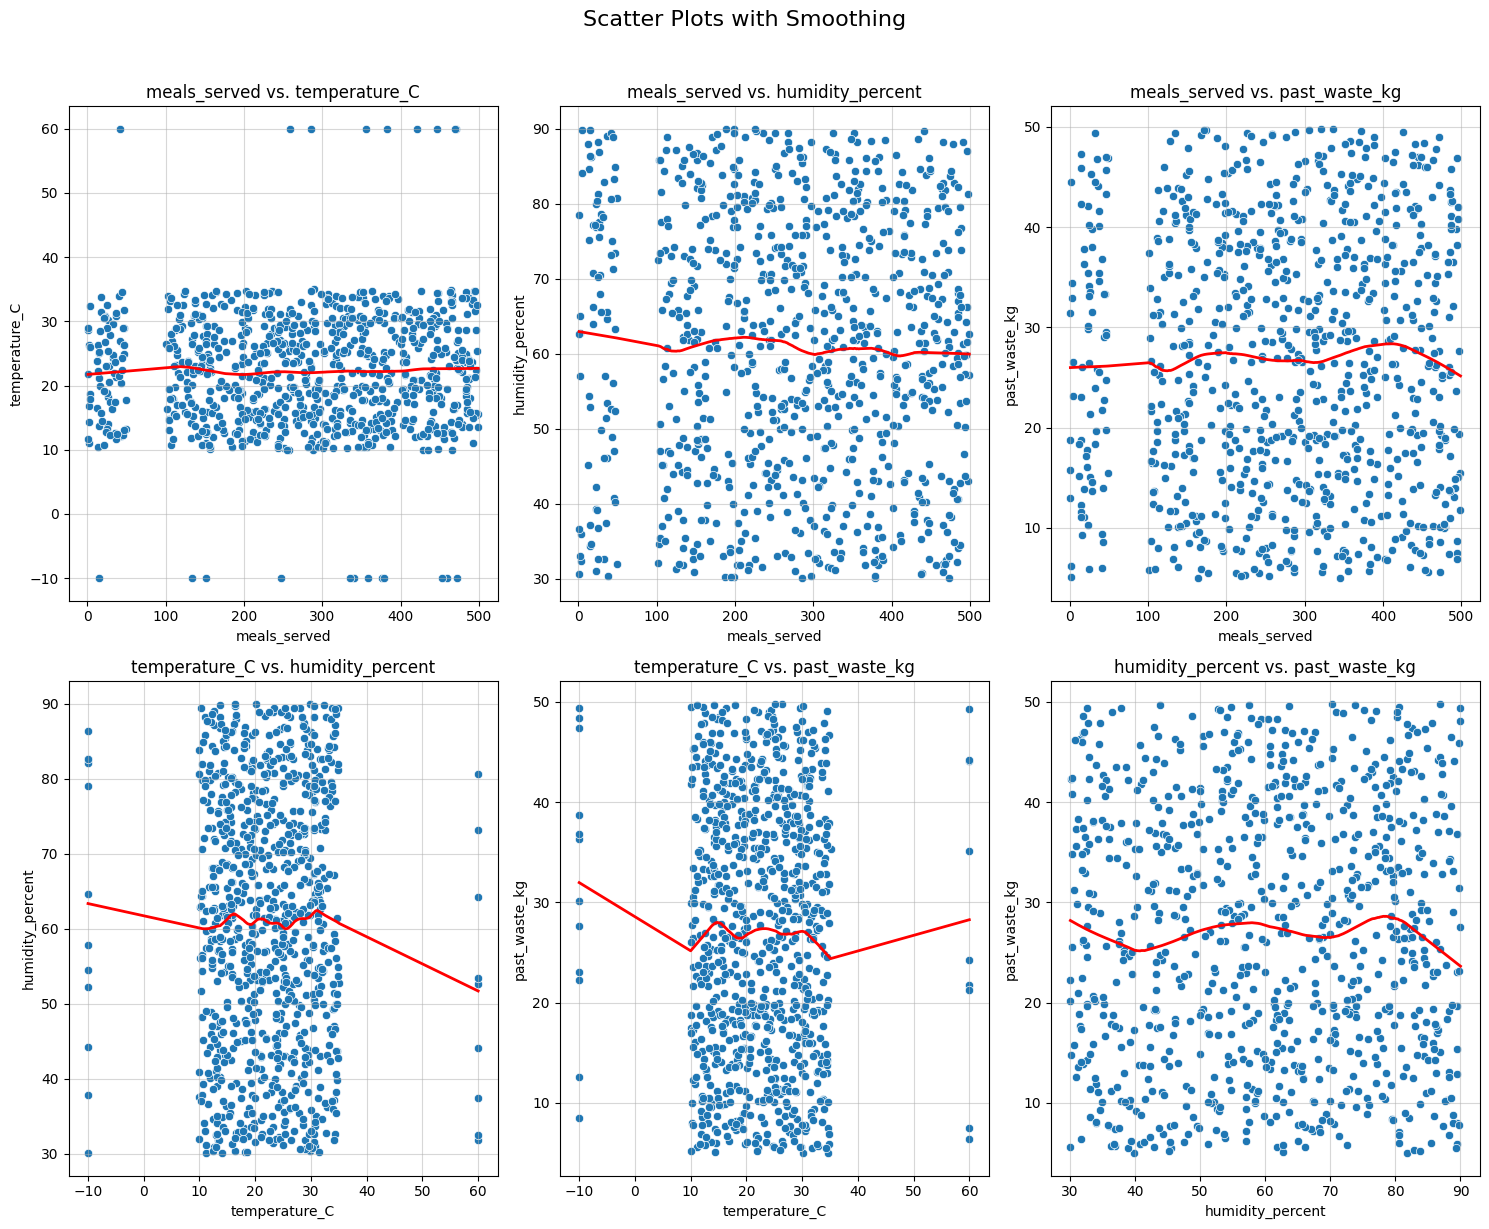

In [114]:
# Scatter Plots with Smoothing:
!pip install statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm

continious_numeric_col = ['meals_served', 'temperature_C', 'humidity_percent','past_waste_kg']

# Generate all unique pairs of columns for scatter plots
column_pairs = list(itertools.combinations(continious_numeric_col, 2))

# Create a figure and axes for the subplots
num_plots = len(column_pairs)
num_cols = 3  #  adjust this for desired layout
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows based on columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Scatter Plots with Smoothing', fontsize=16, y=1.02)
axes = axes.flatten()

for i, (col1, col2) in enumerate(column_pairs):
    ax = axes[i]
    sns.scatterplot(x=df[col1], y=df[col2], ax=ax)

    # Add smoothing using LOESS (lowess) from statsmodels
    lowess = sm.nonparametric.lowess(df[col2], df[col1], frac=0.3)  # Adjust 'frac' for smoothness
    ax.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2)

    ax.set_title(f'{col1} vs. {col2}', fontsize=12)
    ax.set_xlabel(col1, fontsize=10)
    ax.set_ylabel(col2, fontsize=10)
    ax.grid(True, alpha=0.5)

# Remove any empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Bivariate Analysis : Box Plot - Categorical Columns vs (One Continious Numeric Column)

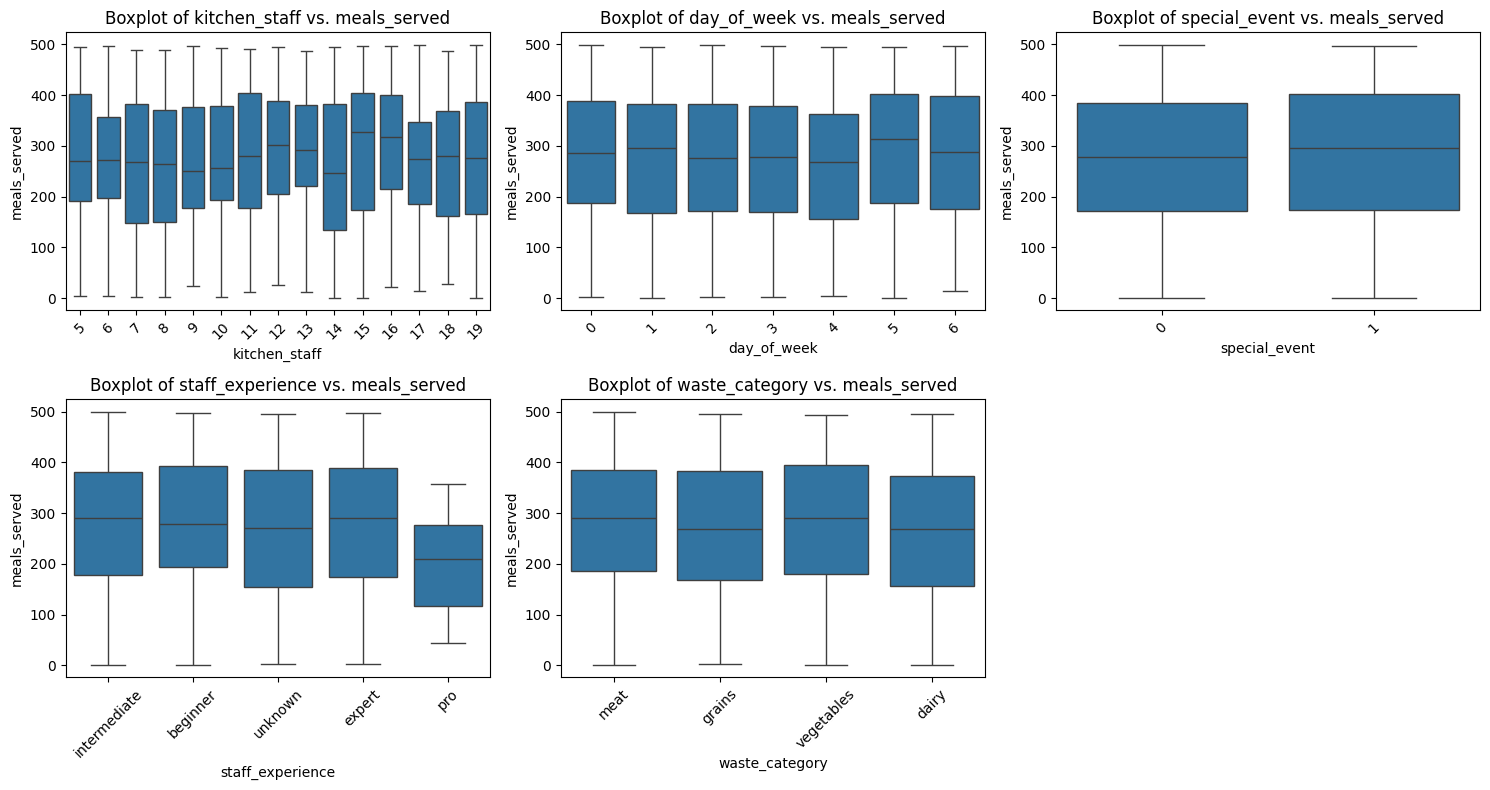

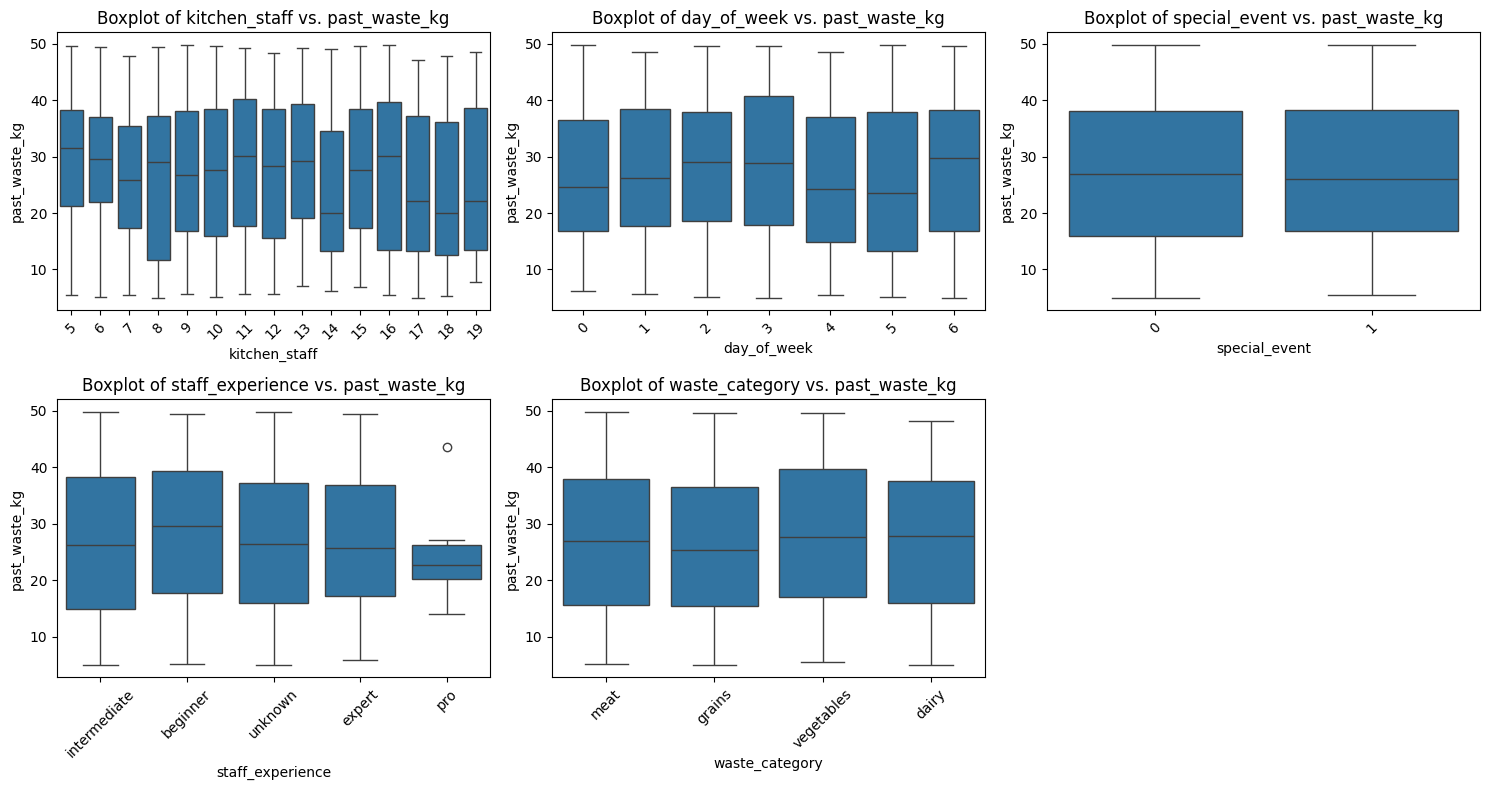

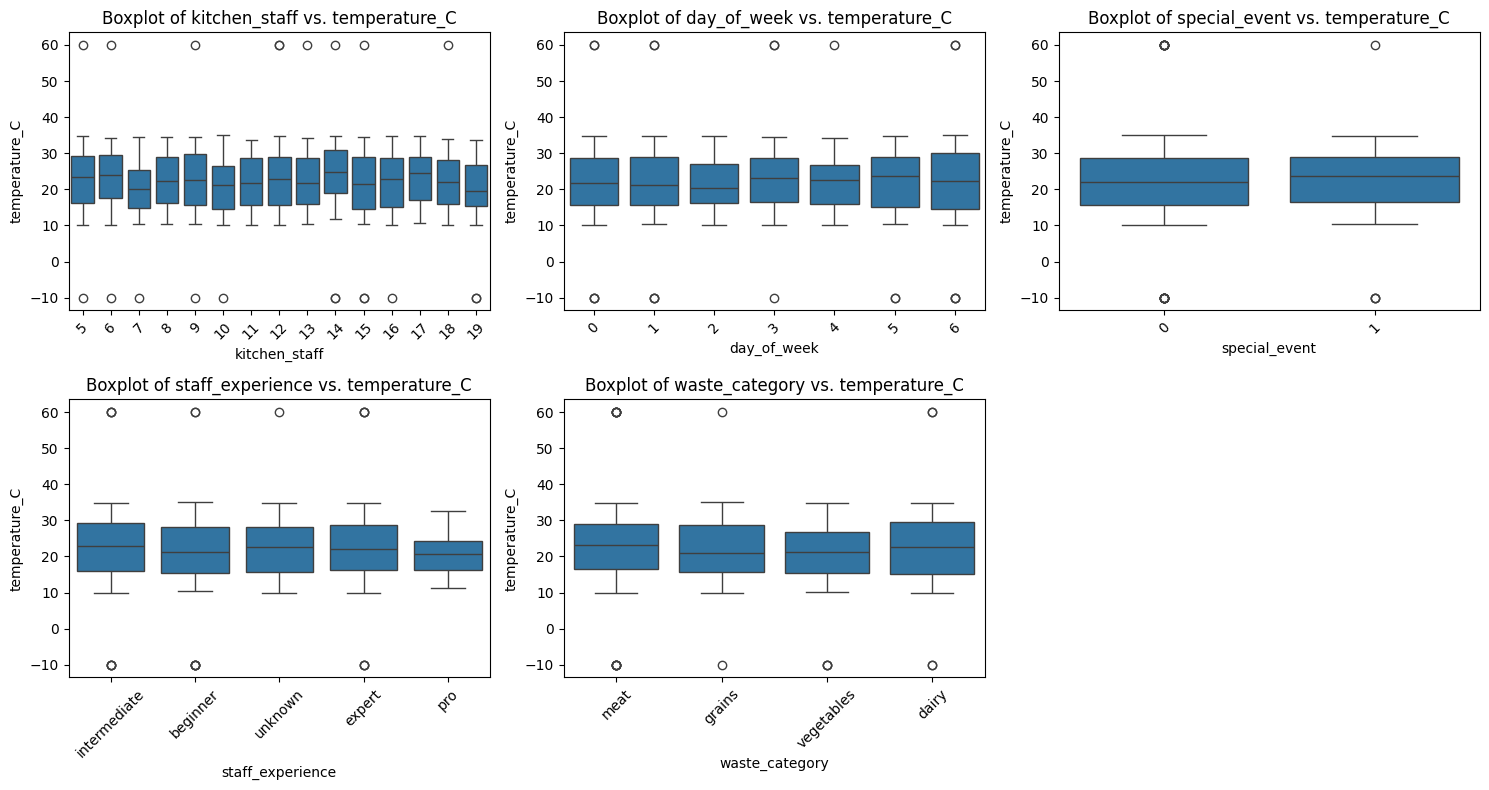

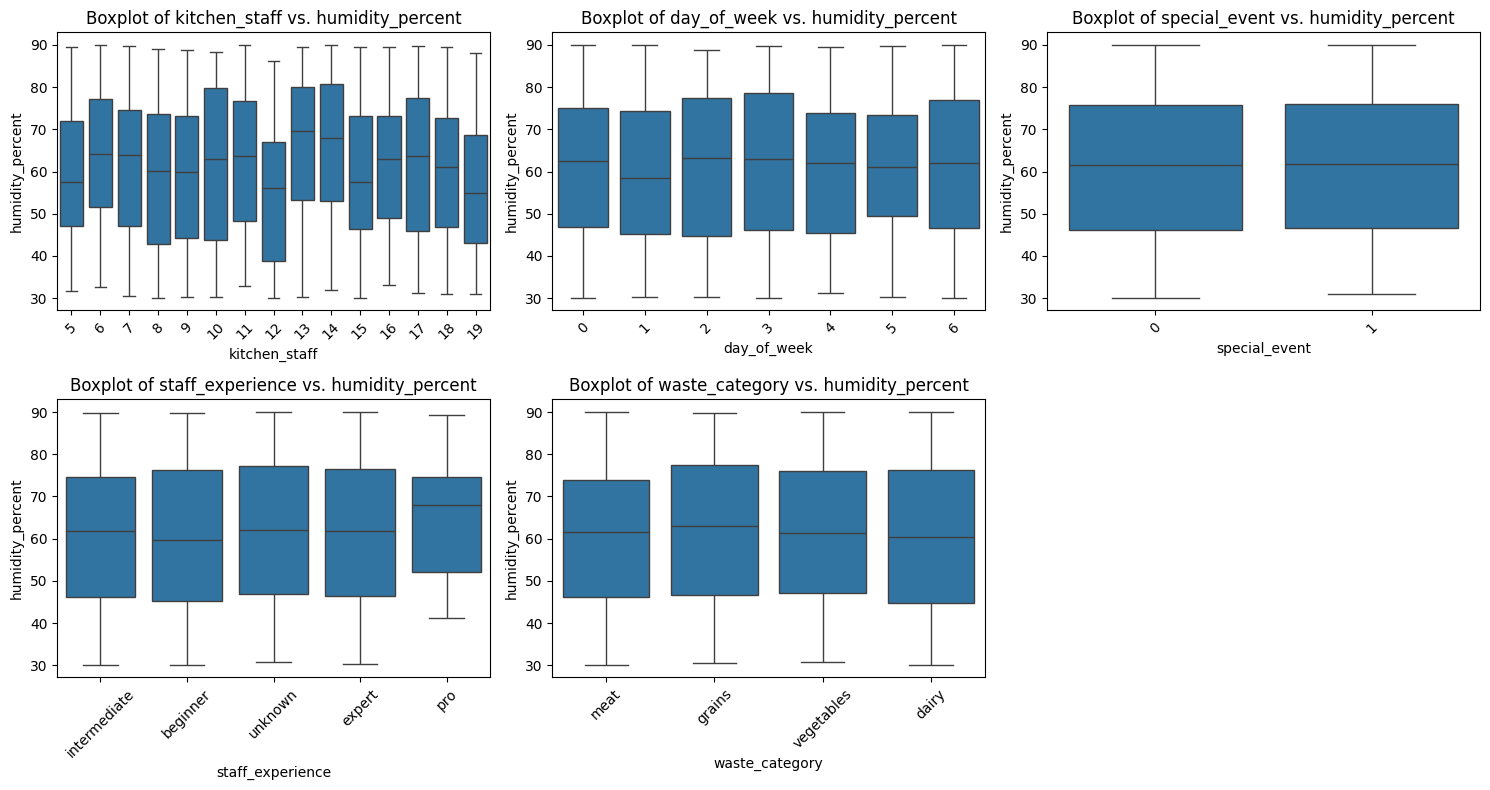

In [105]:
categorical_col = ['kitchen_staff', 'day_of_week', 'special_event', 'staff_experience', 'waste_category']

# Boxplots for categorical features vs. meals_served
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], y=df['meals_served'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. meals_served')

plt.tight_layout()
plt.show()


# Boxplots for categorical features vs. 'past_waste_kg'
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], y=df['past_waste_kg'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. past_waste_kg')

plt.tight_layout()
plt.show()

# Boxplots for categorical features vs. 'temperature_C'
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], y=df['temperature_C'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. temperature_C')

plt.tight_layout()
plt.show()

# Boxplots for categorical features vs. 'humidity_percent'
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], y=df['humidity_percent'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. humidity_percent')

plt.tight_layout()
plt.show()

#### Bivariate Analysis: Correlation (Two Variables)

In [106]:
df.corr(numeric_only=True)

meals_served  kitchen_staff  temperature_C  \
meals_served          1.000000       0.019120       0.024208   
kitchen_staff         0.019120       1.000000      -0.014014   
temperature_C         0.024208      -0.014014       1.000000   
humidity_percent     -0.034229      -0.005797      -0.010483   
day_of_week           0.015211       0.032064       0.017404   
special_event         0.017509       0.007730      -0.006981   
past_waste_kg         0.024124      -0.079865      -0.029359   

                  humidity_percent  day_of_week  special_event  past_waste_kg  
meals_served             -0.034229     0.015211       0.017509       0.024124  
kitchen_staff            -0.005797     0.032064       0.007730      -0.079865  
temperature_C            -0.010483     0.017404      -0.006981      -0.029359  
humidity_percent          1.000000     0.021802       0.012830       0.016214  
day_of_week               0.021802     1.000000      -0.036116       0.000210  
special_event             0.012830    -0.036116       1.000000       0.002189  
past_waste_kg             0.016214     0.000210       0.002189       1.000000

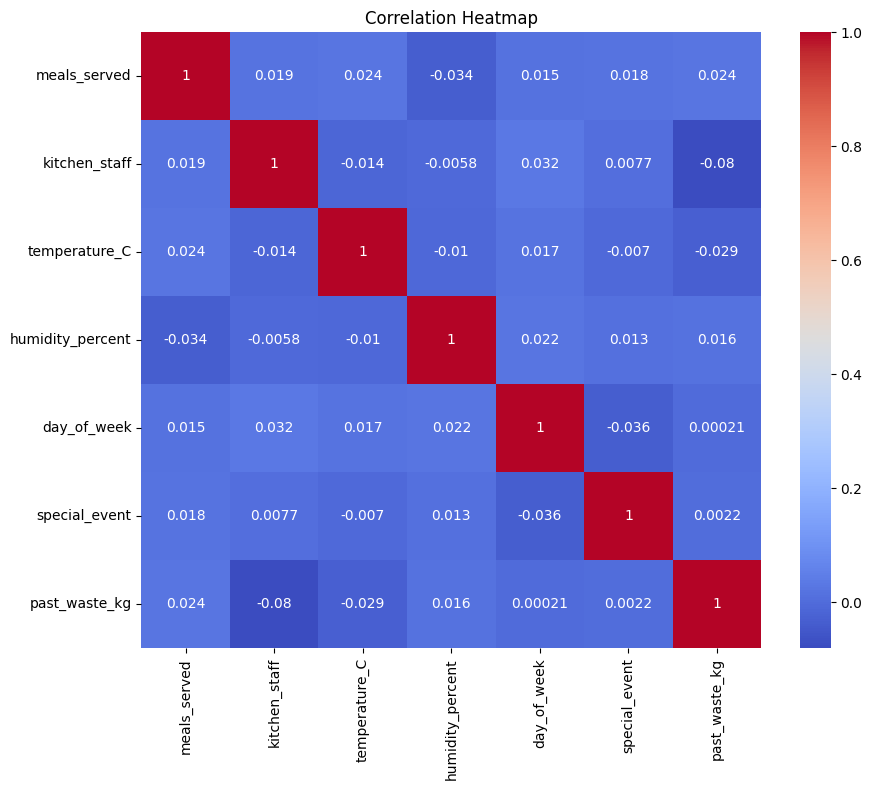

In [108]:
# correlation  between any two variables'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

#### Bivariate Analysis: Spearman Correlation

In [118]:
import pandas as pd
from scipy.stats import spearmanr
import itertools

numeric_col = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg',
                'kitchen_staff', 'day_of_week', 'special_event']

# Generate all unique pairs of columns
column_pairs = list(itertools.combinations(numeric_col, 2))

# Create an empty list to store the results
correlation_results = []

# Calculate and store Spearman correlations
for col1, col2 in column_pairs:
    correlation, p_value = spearmanr(df[col1], df[col2])
    correlation_results.append([col1, col2, correlation, p_value])

# Create a Pandas DataFrame from the results
correlation_df = pd.DataFrame(correlation_results, columns=['Variable 1', 'Variable 2', 'Spearman-Corr', 'P-value'])

# Display the DataFrame
print(correlation_df)

          Variable 1        Variable 2  Spearman-Corr   P-value
0       meals_served     temperature_C       0.019847  0.559477
1       meals_served  humidity_percent      -0.037043  0.275923
2       meals_served     past_waste_kg       0.024339  0.474152
3       meals_served     kitchen_staff       0.019282  0.570726
4       meals_served       day_of_week       0.013464  0.692174
5       meals_served     special_event       0.016932  0.618581
6      temperature_C  humidity_percent       0.007829  0.817952
7      temperature_C     past_waste_kg      -0.023478  0.489933
8      temperature_C     kitchen_staff      -0.007877  0.816839
9      temperature_C       day_of_week       0.022045  0.516829
10     temperature_C     special_event       0.009427  0.781634
11  humidity_percent     past_waste_kg       0.015581  0.646856
12  humidity_percent     kitchen_staff      -0.005979  0.860442
13  humidity_percent       day_of_week       0.020520  0.546250
14  humidity_percent     special_event  

### Multivariate Analysis

#### Multivariate Analysis : Numeric Columns vs Hue = One categorical Column (Text Column)

In [109]:
df.columns

Index(['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category'],
      dtype='object')

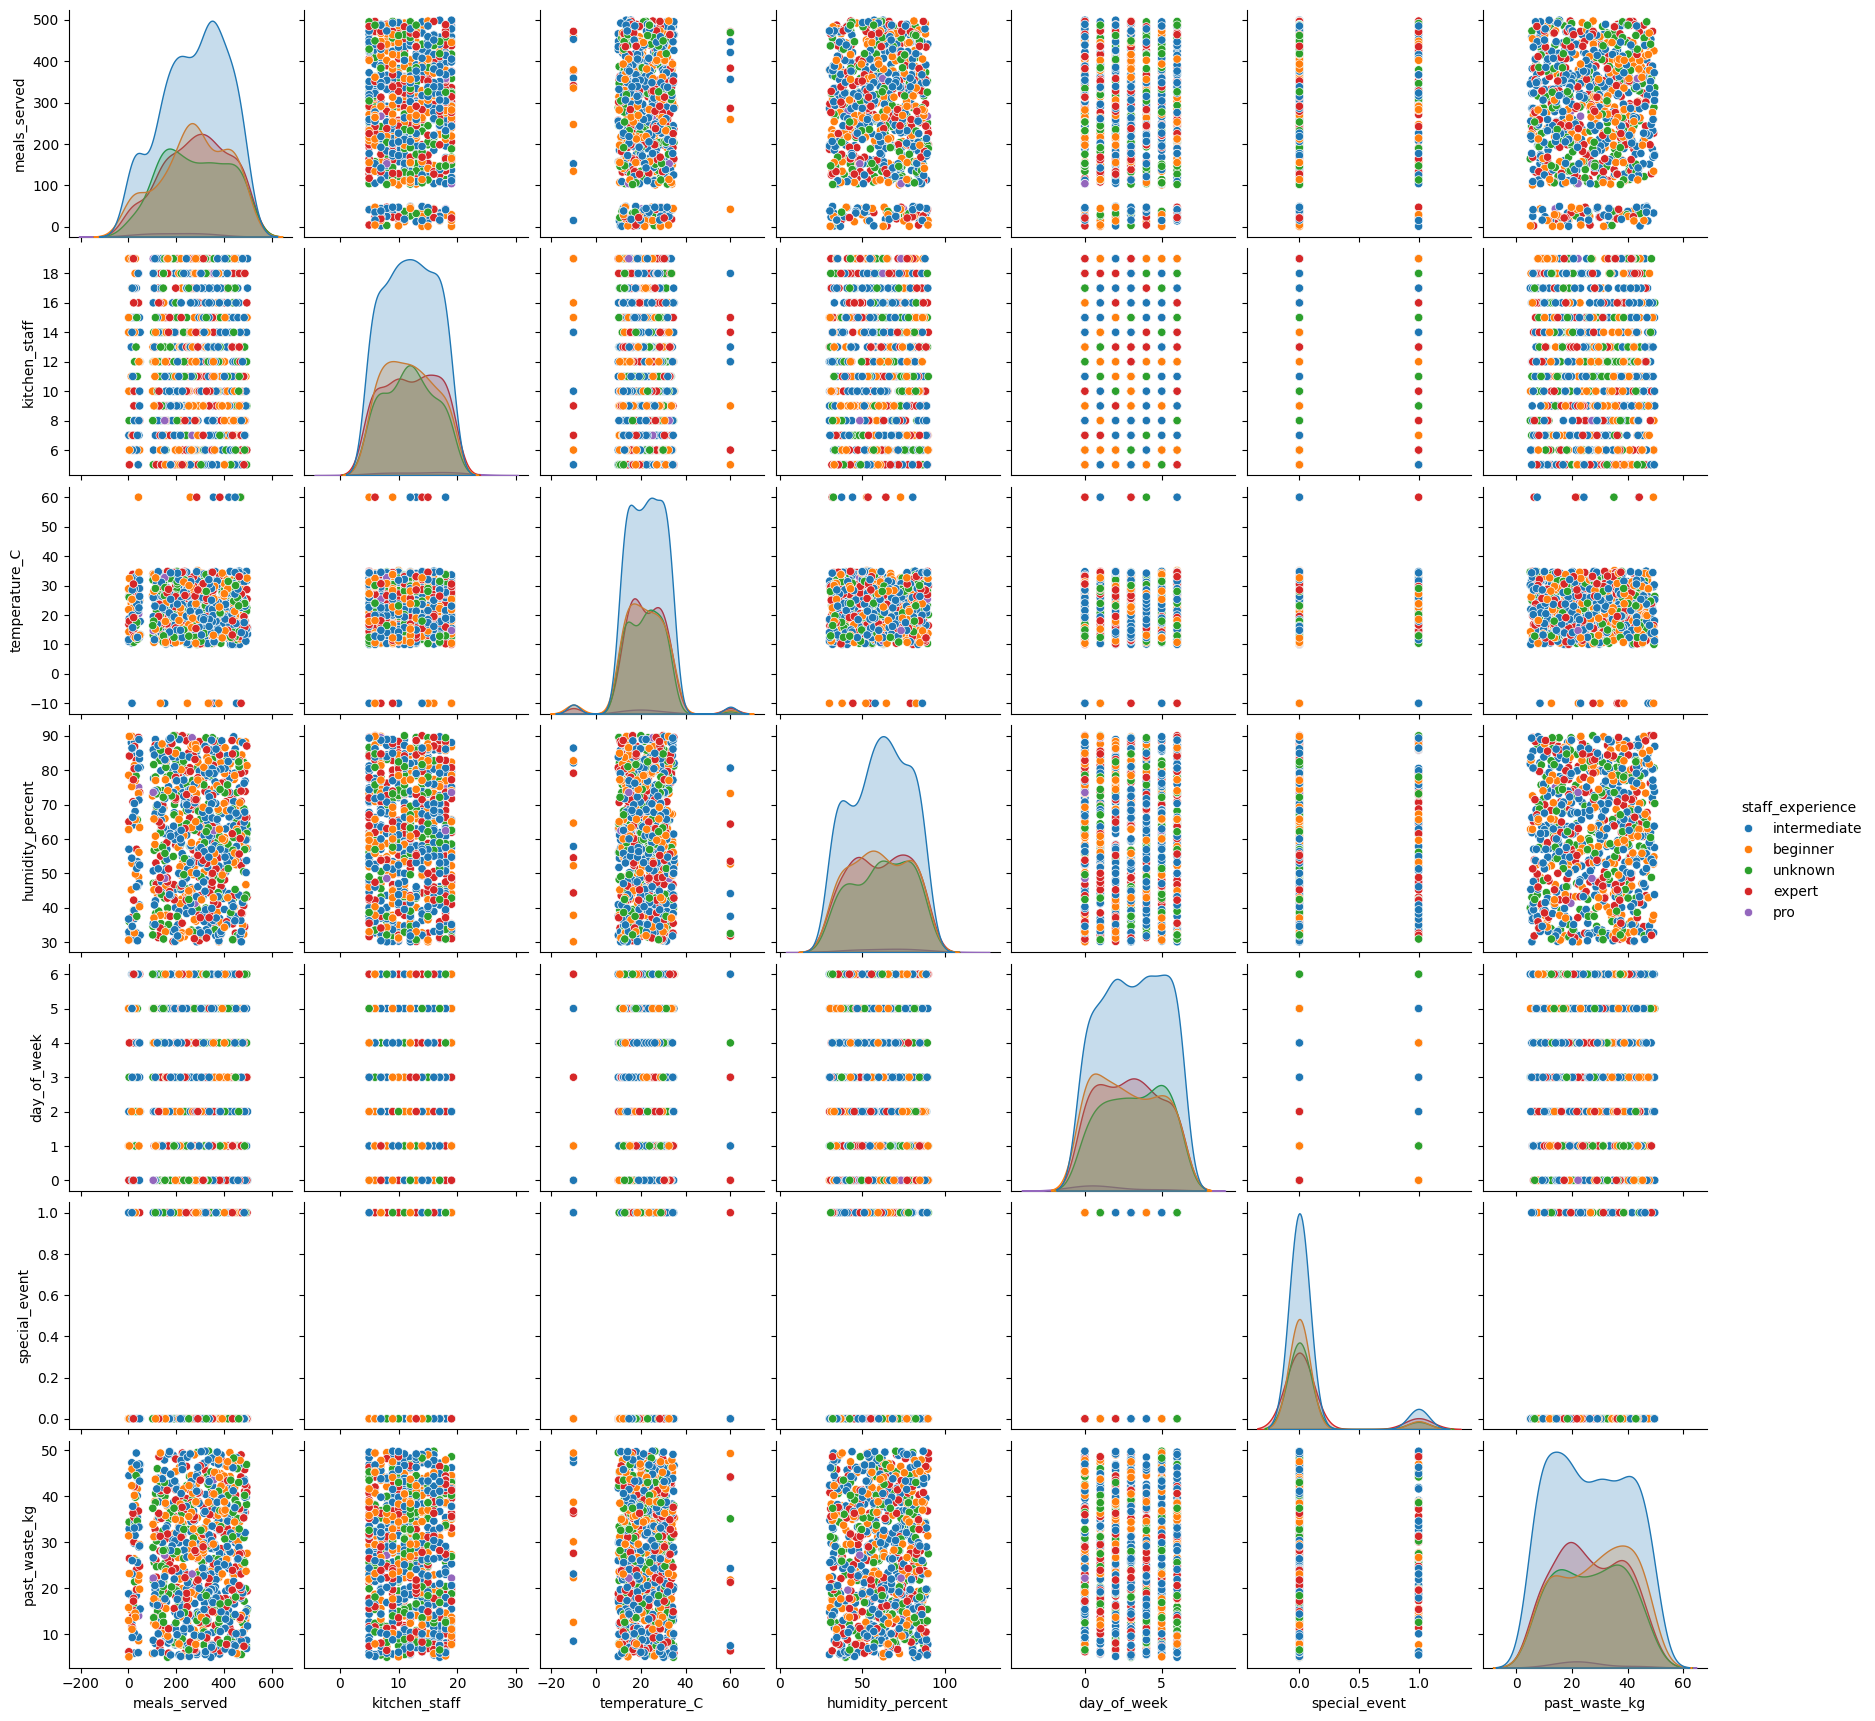

----------------------------------------------------------------------------------------------------------------------


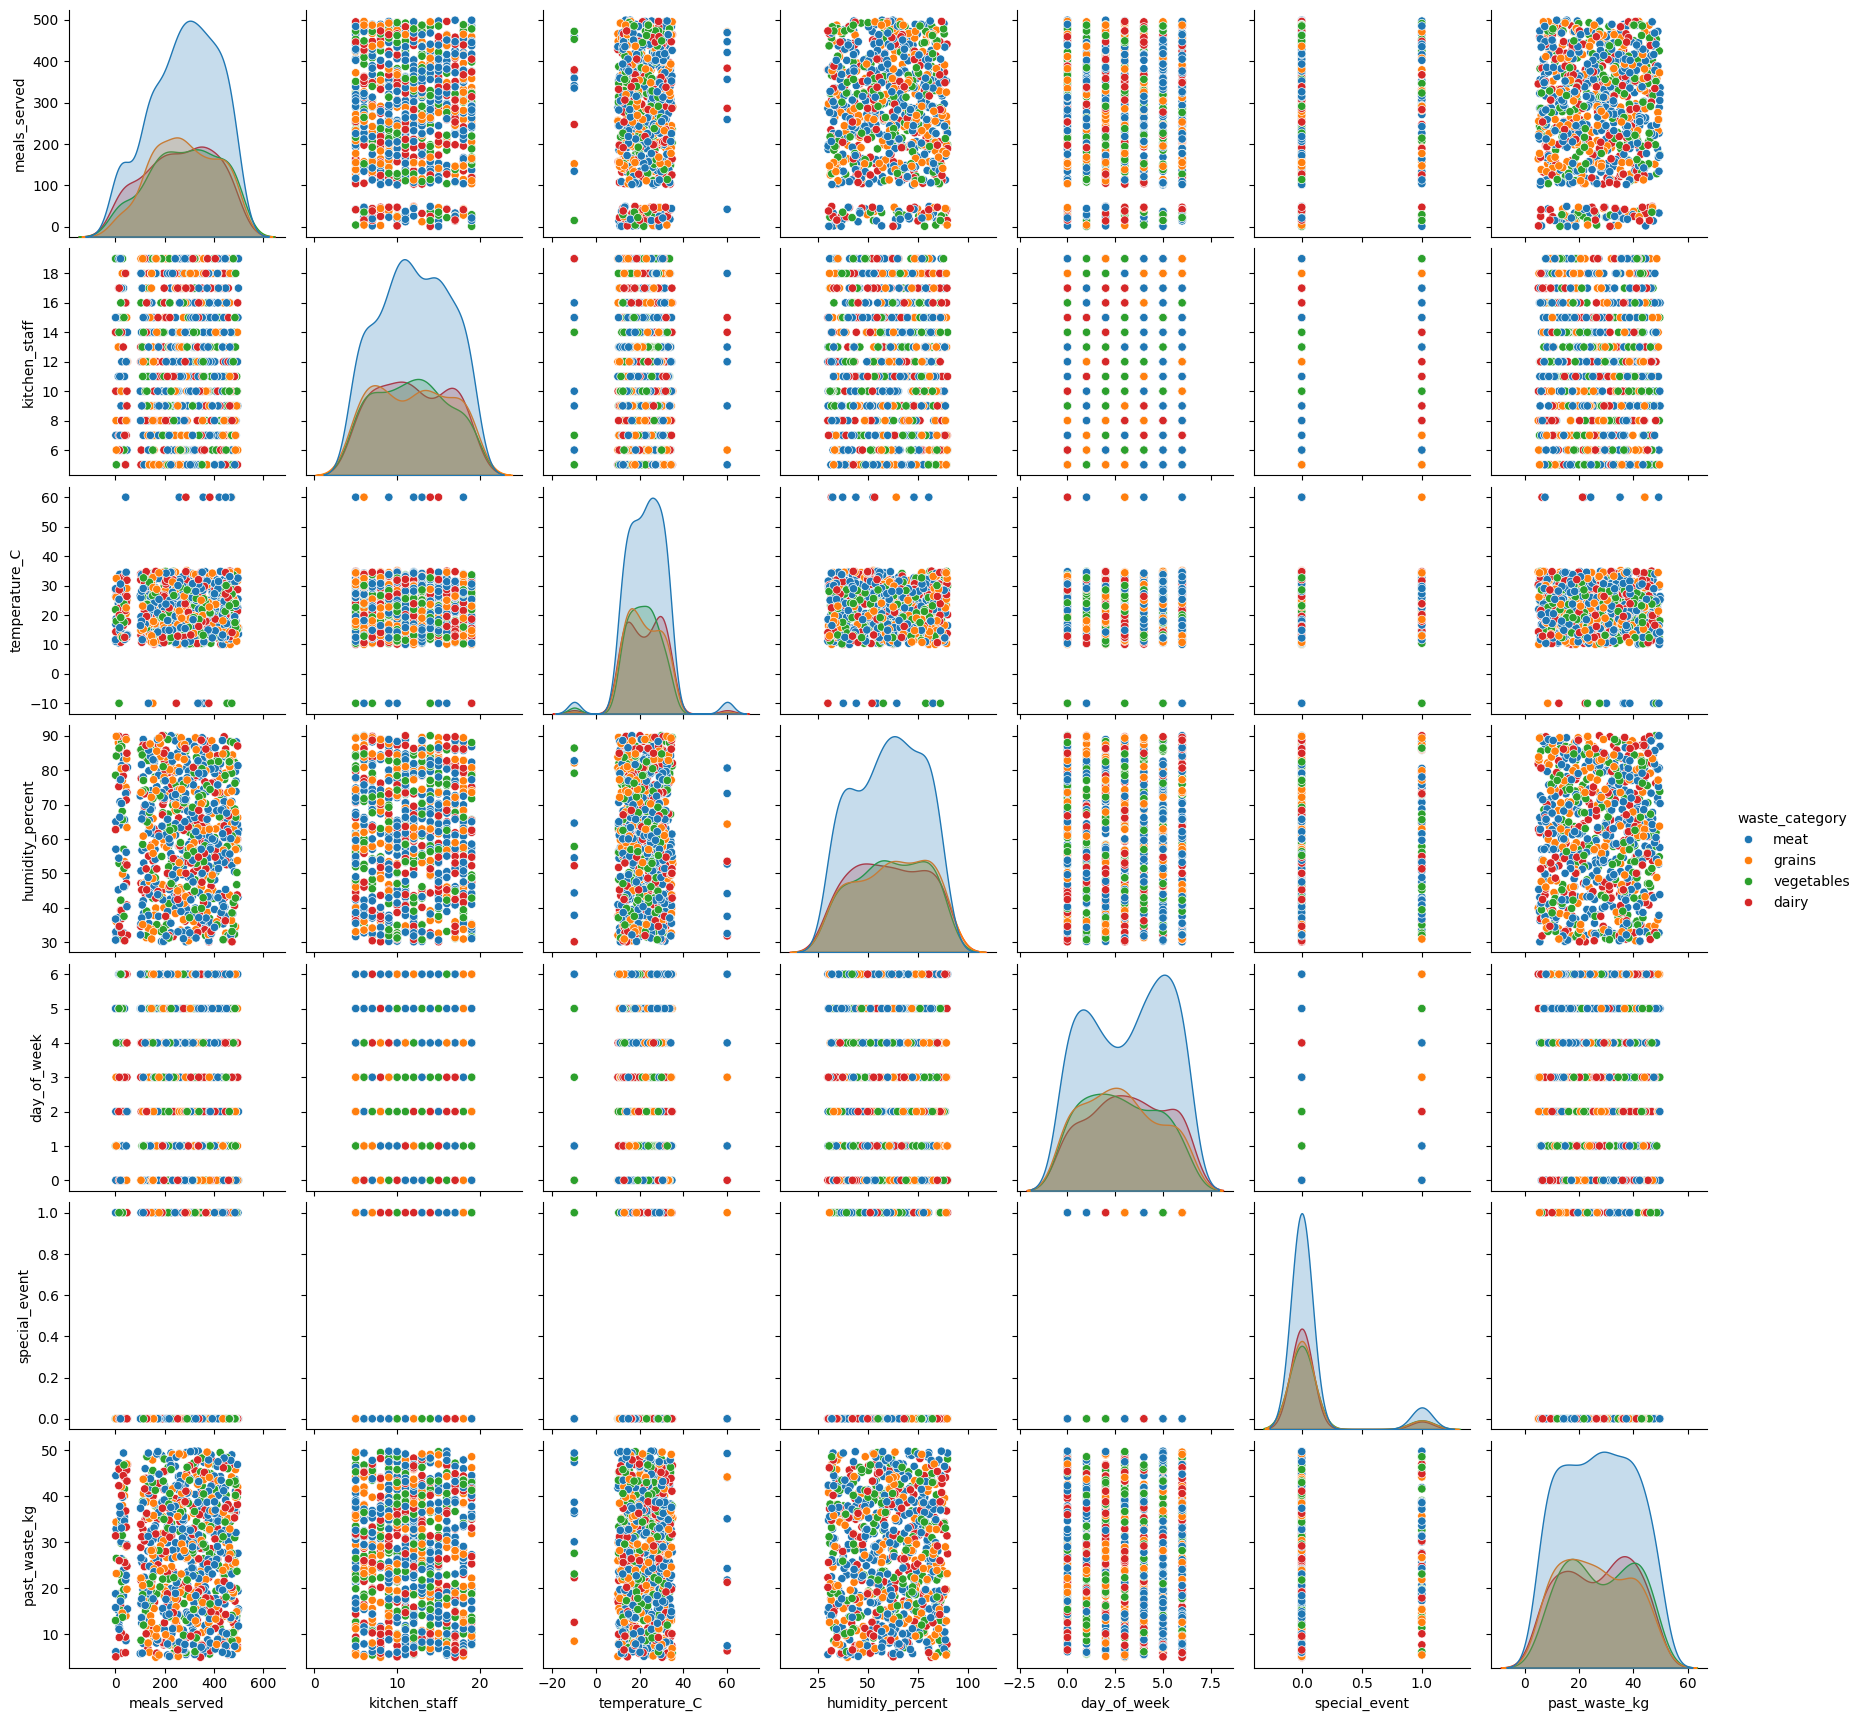

In [111]:
# Multivariate Analysis: Pairplot
sns.pairplot(df, hue='staff_experience') #hues are categorical column
plt.show()

print("----------------------------------------------------------------------------------------------------------------------")

# Multivariate Analysis: Pairplot
sns.pairplot(df, hue='waste_category') #hues are categorical column
plt.show()
